In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
data = pd.read_csv("estonia-passenger-list.csv")

In [6]:
data.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


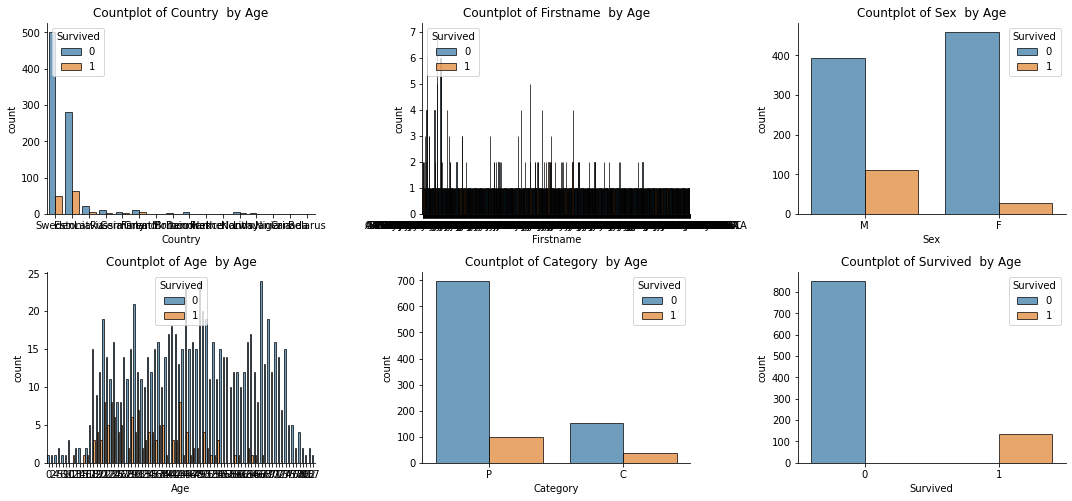

In [7]:
plt.figure(figsize=[15,17])
fft=['Country','Firstname','Sex','Age','Category','Survived']
n=1
for f in fft:
    plt.subplot(5,3,n)
    sns.countplot(x=f, hue='Survived', edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Countplot of {}  by Age".format(f))
    n=n+1
plt.tight_layout()
plt.show()

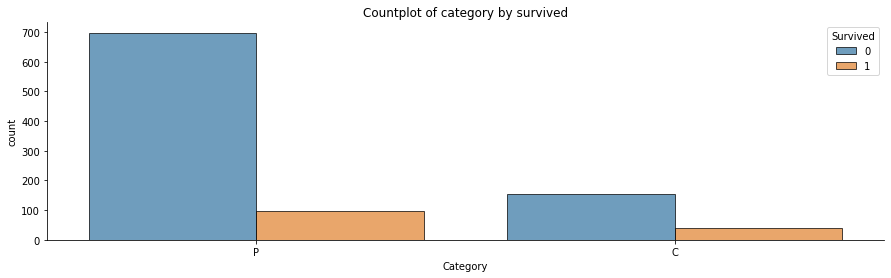

In [8]:
plt.figure(figsize=[15,4])
sns.countplot(x='Category', hue='Survived',edgecolor="black", alpha=0.7, data=data)
sns.despine()
plt.title("Countplot of category by survived")
plt.show()

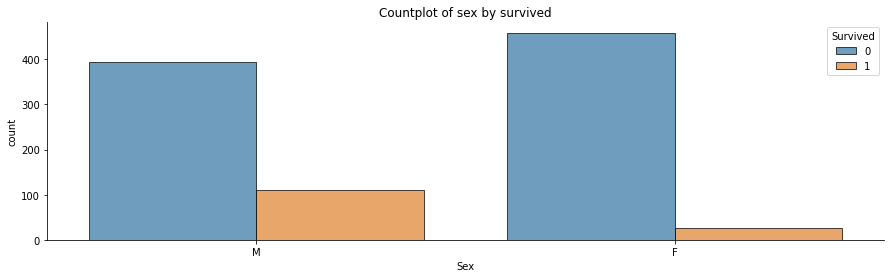

In [9]:
plt.figure(figsize=[15,4])
sns.countplot(x='Sex', hue='Survived',edgecolor="black", alpha=0.7, data=data)
sns.despine()
plt.title("Countplot of sex by survived")
plt.show()

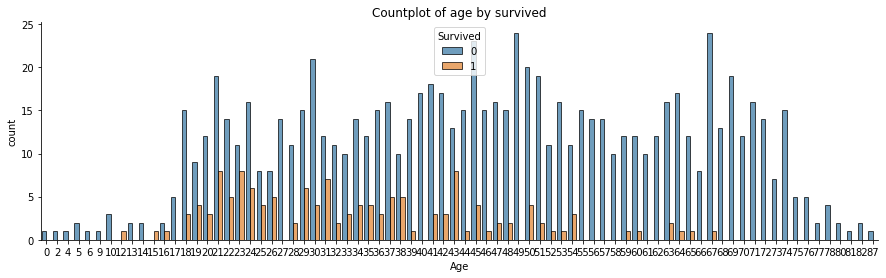

In [10]:
plt.figure(figsize=[15,4])
sns.countplot(x='Age', hue='Survived',edgecolor="black", alpha=0.7, data=data)
sns.despine()
plt.title("Countplot of age by survived")
plt.show()

In [11]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

cd = data['Survived'].value_counts().reset_index()
cd.columns = [
    'Survived', 
    'count'
]
cd['Survived'] = cd['Survived'].astype(str) + '-'
cd = cd.sort_values(['count']).tail(50)

fig = px.bar(
    cd, 
    x='count', 
    y='Survived', 
    orientation='h', 
    title='Count: Survived', 
    width=1000,
    height=900 
)

fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distributional of age')

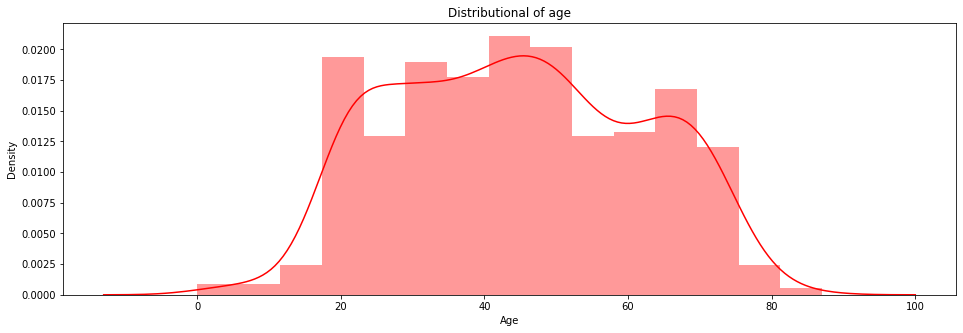

In [12]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(data["Age"], color="red",ax = axes)
plt.title("Distributional of age")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



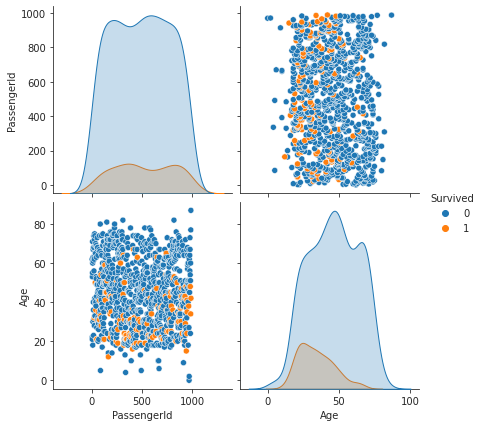

In [13]:
sns.set_style("ticks")
sns.pairplot(data,hue="Survived",size=3);
plt.show()

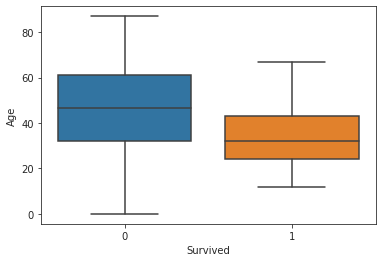

In [14]:
#plot outcome by age
sns.boxplot(x="Survived",y="Age",data=data)
plt.show()

In [15]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

ep = data['Survived'].value_counts().reset_index()
ep.columns = [
    'Survived', 
    'percent'
]
ep['percent'] /= len(data)

fig = px.pie(
    ep, 
    names='Survived', 
    values='percent', 
    title='Survived', 
    width=800,
    height=500 
)

fig.show()

In [16]:
display(data[["PassengerId","Country","Age","Survived"]].groupby(["PassengerId","Age","Country"]).agg("sum").sort_values(by="PassengerId",
                                                          ascending = False).head(100).style.background_gradient(cmap='autumn'))

,,,Survived
PassengerId,Age,Country,
989,42,Sweden,1
988,87,Sweden,0
987,77,Sweden,0
986,34,Sweden,1
985,60,Sweden,0
984,51,Sweden,0
983,24,Sweden,0
982,48,Sweden,1
981,54,Sweden,0


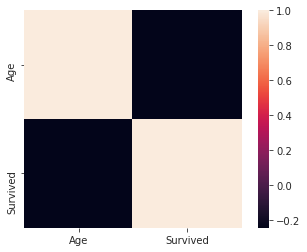

In [17]:
data = data[['Sex','Age','Category', 'Survived']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [18]:
#C : Crew, P :  Passenger
Category = {'C': 1,'P': 2} 
  
# traversing through dataframe 
# values where key matches 
data.Category = [Category[item] for item in data.Category] 
print(data)

    Sex  Age  Category  Survived
0     M   62         2         0
1     F   22         1         0
2     F   21         1         0
3     M   53         1         0
4     F   55         2         0
..   ..  ...       ...       ...
984   F   60         2         0
985   M   34         2         1
986   M   77         2         0
987   F   87         2         0
988   M   42         2         1

[989 rows x 4 columns]


In [19]:
#M: Male , F:Female
Sex = {'M': 1,'F': 2} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
data.Sex = [Sex[item] for item in data.Sex] 
print(data)

     Sex  Age  Category  Survived
0      1   62         2         0
1      2   22         1         0
2      2   21         1         0
3      1   53         1         0
4      2   55         2         0
..   ...  ...       ...       ...
984    2   60         2         0
985    1   34         2         1
986    1   77         2         0
987    2   87         2         0
988    1   42         2         1

[989 rows x 4 columns]


In [20]:
from sklearn.model_selection import train_test_split
Y = data['Survived']
X = data.drop(columns=['Survived'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [21]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (791, 3)
Y train shape:  (791,)
X test shape:  (198, 3)
Y test shape:  (198,)


In [22]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

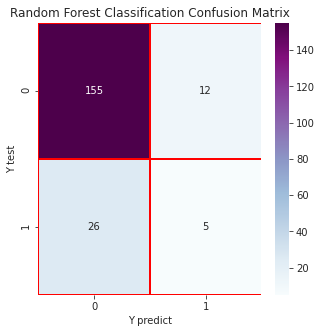

In [23]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [24]:
test_acc_rfcla = round(rfcla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_rfcla = round(rfcla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

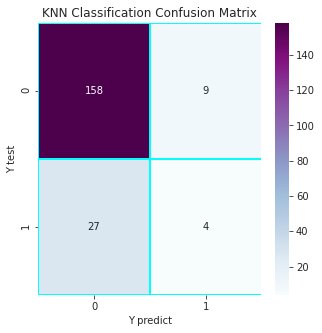

In [26]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [27]:
test_acc_knncla = round(knncla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_knncla = round(knncla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [28]:
#Accuracy
model1 = pd.DataFrame({
    'Model': ['Random Forest','KNN'],
    'Train Score': [train_acc_rfcla, train_acc_knncla],
    'Test Score': [test_acc_rfcla, test_acc_knncla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
1,KNN,87.61,81.82
0,Random Forest,88.75,80.81


In [29]:
Y1 = data['Survived']
X1 = data.drop(columns=['Category'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Sex', 'Age', 'Survived']
3


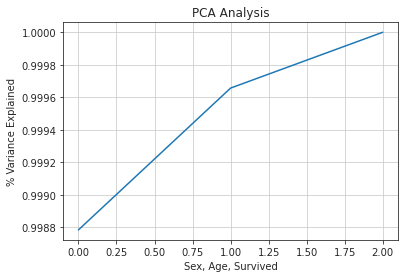

In [30]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Sex, Age, Survived')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [31]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(0,3))) 
print(variance[10:90])

Series([], dtype: float64)


In [32]:
X1 = data[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

In [33]:
# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm1 = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

In [34]:
Testscores1 = pd.Series([score1_rfcla], index=['Random Forest Score']) 
print(Testscores1)

Random Forest Score    1.0
dtype: float64


In [35]:
Y1 = data['Survived']
X1 = data.drop(columns=['Age'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Sex', 'Category', 'Survived']
3


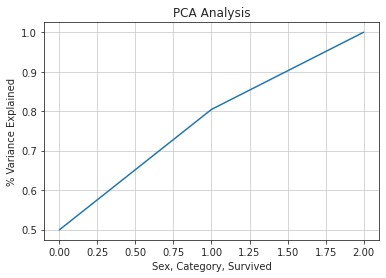

In [36]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Sex, Category, Survived')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [37]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(0,3))) 
print(variance[10:90])

Series([], dtype: float64)


In [38]:
X1 = data[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

In [39]:
# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm2 = confusion_matrix(Y1_test, Y1_predict5)
score2_rfcla = rfcla.score(X1_test, Y1_test)

In [40]:
All_Score = pd.Series([test_acc_rfcla,score1_rfcla,score2_rfcla], index=['Random Forest: all features','Random Forest : Age, Sex',
                                                                        'Random Forest: Sex and Category']) 
print(All_Score)

Random Forest: all features        80.81
Random Forest : Age, Sex            1.00
Random Forest: Sex and Category     1.00
dtype: float64


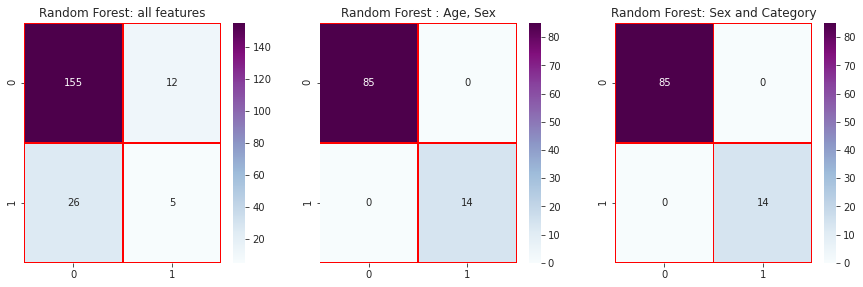

In [41]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Random Forest: all features') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('Random Forest : Age, Sex')
ax5 = fig.add_subplot(3, 3,3)
ax5.set_title('Random Forest: Sex and Category')

sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax1)
sns.heatmap(data=rfcla_cm1, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfcla_cm2, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax5)
plt.show()